In [ ]:
!pip install --upgrade kaggle


In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nischal1621","key":"b1d5cbba2b5cf4d320eaa6bf10a05c8f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d nischal1621/v2a-data


Dataset URL: https://www.kaggle.com/datasets/nischal1621/v2a-data
License(s): unknown
 99% 1.01G/1.02G [00:05<00:00, 195MB/s]
100% 1.02G/1.02G [00:05<00:00, 206MB/s]


In [4]:
!unzip -q v2a-data.zip -d /content/v2a-data


In [5]:
# Step 1 — clean install
!pip install -U transformers huggingface-hub accelerate --quiet

# Step 2 — login to Hugging Face (only once)
from huggingface_hub import login
login()   # paste your Hugging Face token here

# Step 3 — load CLIP model and processor
from transformers import CLIPProcessor, CLIPModel

model_name = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name)

print("✅ Model loaded successfully!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 135.4 MB/s eta 0:00:00


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

✅ Model loaded successfully!


In [6]:
import os
import pandas as pd

# ✅ Use Colab paths instead of /kaggle/input
video_dir = '/content/v2a-data/video1'
audio_dir = '/content/v2a-data/music1'

# ✅ Check that folders exist
print("Video dir exists:", os.path.exists(video_dir))
print("Audio dir exists:", os.path.exists(audio_dir))

# ✅ Create dictionaries mapping file base names → full paths
video_files = {os.path.splitext(f)[0]: os.path.join(video_dir, f)
               for f in os.listdir(video_dir) if f.endswith(('.mp4', '.avi', '.mov'))}

audio_files = {os.path.splitext(f)[0]: os.path.join(audio_dir, f)
               for f in os.listdir(audio_dir) if f.endswith(('.wav', '.mp3'))}

# ✅ Match video–audio pairs by same base filename
pairs = []
for vid_id, vid_path in video_files.items():
    if vid_id in audio_files:
        pairs.append({'id': vid_id, 'video_path': vid_path, 'audio_path': audio_files[vid_id]})

# ✅ Save to CSV for later use
df = pd.DataFrame(pairs)
df.to_csv('/content/video_audio_pairs.csv', index=False)

print("✅ Saved pairs:", len(df))
print(df.head())


Video dir exists: True
Audio dir exists: True
✅ Saved pairs: 33
            id                                video_path  \
0  _Z3QKkl1WyM  /content/v2a-data/video1/_Z3QKkl1WyM.mp4   
1  4YmCIp4qlGg  /content/v2a-data/video1/4YmCIp4qlGg.mp4   
2  _3kEH2ITVdI  /content/v2a-data/video1/_3kEH2ITVdI.mp4   
3  2VfC_NeTkHE  /content/v2a-data/video1/2VfC_NeTkHE.mp4   
4  2bFstJov7Ho  /content/v2a-data/video1/2bFstJov7Ho.mp4   

                                 audio_path  
0  /content/v2a-data/music1/_Z3QKkl1WyM.wav  
1  /content/v2a-data/music1/4YmCIp4qlGg.wav  
2  /content/v2a-data/music1/_3kEH2ITVdI.wav  
3  /content/v2a-data/music1/2VfC_NeTkHE.wav  
4  /content/v2a-data/music1/2bFstJov7Ho.wav  


In [7]:
!pip install decord


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 71.8 MB/s eta 0:00:00


In [8]:
!pip install transformers decord accelerate torch torchaudio

In [7]:
"""
STEP 1: Install Required Packages (CLEAN - No Torchaudio)
Use this approach - it's more stable on Kaggle!
"""

# Check current PyTorch version
import torch
print(f"Current PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

# Install only necessary packages (NO torchaudio)
!pip install -q opencv-python-headless  # headless version for servers
!pip install -q librosa  # Audio processing
!pip install -q soundfile  # Audio I/O
!pip install -q matplotlib  # Visualization

print("\n" + "="*70)
print("✓ All packages installed successfully!")
print("="*70)

# Verify installation
import torch
import librosa
import soundfile as sf
import cv2
import numpy as np
from transformers import __version__ as transformers_version

print(f"\n✅ PyTorch: {torch.__version__}")
print(f"✅ CUDA: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✅ GPU: {torch.cuda.get_device_name(0)}")
print(f"✅ Transformers: {transformers_version}")
print(f"✅ Librosa: {librosa.__version__}")
print(f"✅ NumPy: {np.__version__}")
print(f"✅ OpenCV: {cv2.__version__}")

print("\n✅ Ready to proceed with the pipeline!")
print("    (Using librosa instead of torchaudio - more stable)")

Current PyTorch version: 2.9.0+cu126
CUDA available: True

✓ All packages installed successfully!

✅ PyTorch: 2.9.0+cu126
✅ CUDA: True
✅ GPU: Tesla T4
✅ Transformers: 4.57.3
✅ Librosa: 0.11.0
✅ NumPy: 2.0.2
✅ OpenCV: 4.12.0

✅ Ready to proceed with the pipeline!
    (Using librosa instead of torchaudio - more stable)


In [8]:
"""
STEP 3: Configuration and Paths Setup (for Google Colab)
"""

import os
import torch

# ✅ Updated paths for Colab
VIDEO_DIR = "/content/v2a-data/video1"
AUDIO_DIR = "/content/v2a-data/music1"
OUTPUT_DIR = "/content/output"

# ✅ Create output directories if they don't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(f"{OUTPUT_DIR}/captions", exist_ok=True)
os.makedirs(f"{OUTPUT_DIR}/models", exist_ok=True)

# ✅ Configuration parameters
CONFIG = {
    'sample_rate': 16000,
    'audio_duration': 10,       # seconds
    'num_frames': 8,            # frames to extract from each video
    'batch_size': 2,
    'num_epochs': 10,
    'learning_rate': 1e-4,
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

# ✅ Print configuration summary
print("Configuration:")
for key, value in CONFIG.items():
    print(f"  {key}: {value}")

print(f"\n✓ Output directory created at: {OUTPUT_DIR}")


Configuration:
  sample_rate: 16000
  audio_duration: 10
  num_frames: 8
  batch_size: 2
  num_epochs: 10
  learning_rate: 0.0001
  device: cuda

✓ Output directory created at: /content/output


In [9]:
"""
STEP 2: Import All Required Libraries (COMPLETE)
"""

import os
import sys
import json
import torch
import cv2
import numpy as np
from pathlib import Path  # <-- This was missing!
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Audio libraries (using librosa instead of torchaudio)
import librosa
import soundfile as sf
from scipy import signal

# PyTorch utilities
from torch.utils.data import Dataset, DataLoader

# Transformers - CLIP and BLIP models
from transformers import (
    BlipProcessor,
    BlipForConditionalGeneration,
    CLIPVisionModel,
    CLIPProcessor,
    CLIPTextModel,
    CLIPTokenizer
)

# Visualization
import matplotlib.pyplot as plt

print("="*70)
print("✓ All libraries imported successfully!")
print("="*70)

print(f"\n📦 Versions:")
print(f"  PyTorch: {torch.__version__}")
print(f"  CUDA: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"  GPU: {torch.cuda.get_device_name(0)}")
print(f"  Librosa: {librosa.__version__}")
print(f"  NumPy: {np.__version__}")
print(f"  OpenCV: {cv2.__version__}")

print("\n✅ Ready to proceed!")

✓ All libraries imported successfully!

📦 Versions:
  PyTorch: 2.9.0+cu126
  CUDA: True
  GPU: Tesla T4
  Librosa: 0.11.0
  NumPy: 2.0.2
  OpenCV: 4.12.0

✅ Ready to proceed!


In [10]:
from pathlib import Path
import json

def extract_id_from_filename(filename):
    """
    Use the filename (without extension) directly as the ID.
    Example:
    - 'video_123.mp4' -> 'video_123'
    - 'clipABC.mov'   -> 'clipABC'
    """
    return Path(filename).stem   # ✅ just filename without extension

def match_video_audio_pairs(video_dir, audio_dir):
    """Match video and audio files by filename ID"""

    video_dir = Path(video_dir)
    audio_dir = Path(audio_dir)

    # Get all video files
    video_files = list(video_dir.glob('*.mp4')) + list(video_dir.glob('*.avi')) + list(video_dir.glob('*.mov'))
    print(f"🎥 Found {len(video_files)} video files")

    # Get all audio files
    audio_files = list(audio_dir.glob('*.wav')) + list(audio_dir.glob('*.mp3'))
    print(f"🎧 Found {len(audio_files)} audio files")

    # Create ID mappings
    video_map = {}
    for v in video_files:
        vid_id = extract_id_from_filename(v)
        video_map[vid_id] = str(v)

    audio_map = {}
    for a in audio_files:
        aud_id = extract_id_from_filename(a)
        audio_map[aud_id] = str(a)

    # Find matching pairs by filename ID
    matched_pairs = []
    for vid_id, vpath in video_map.items():
        if vid_id in audio_map:
            matched_pairs.append({
                'id': vid_id,                  # ✅ use filename as ID
                'video_path': vpath,
                'audio_path': audio_map[vid_id]
            })

    print(f"\n✅ Found {len(matched_pairs)} matched video-audio pairs!")
    print("\nFirst 3 matched pairs:")
    for i, pair in enumerate(matched_pairs[:3]):
        print(f"  {i+1}. ID: {pair['id']}")
        print(f"     Video: {Path(pair['video_path']).name}")
        print(f"     Audio: {Path(pair['audio_path']).name}")

    return matched_pairs

# Execute matching
matched_pairs = match_video_audio_pairs(VIDEO_DIR, AUDIO_DIR)

# Save matched pairs to JSON
pairs_file = f"{OUTPUT_DIR}/matched_pairs.json"
with open(pairs_file, 'w') as f:
    json.dump(matched_pairs, f, indent=2)
print(f"\n💾 Saved matched pairs to: {pairs_file}")


🎥 Found 33 video files
🎧 Found 33 audio files

✅ Found 33 matched video-audio pairs!

First 3 matched pairs:
  1. ID: _Z3QKkl1WyM
     Video: _Z3QKkl1WyM.mp4
     Audio: _Z3QKkl1WyM.wav
  2. ID: 4YmCIp4qlGg
     Video: 4YmCIp4qlGg.mp4
     Audio: 4YmCIp4qlGg.wav
  3. ID: _3kEH2ITVdI
     Video: _3kEH2ITVdI.mp4
     Audio: _3kEH2ITVdI.wav

💾 Saved matched pairs to: /content/output/matched_pairs.json


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from torch.optim.lr_scheduler import CosineAnnealingLR

import torchaudio
import torchvision.transforms as transforms
from transformers import CLIPVisionModel, CLIPTextModel, CLIPTokenizer

import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf
import warnings
warnings.filterwarnings('ignore')

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✅ Using device: {device}")

if torch.cuda.is_available():
    print(f"  GPU: {torch.cuda.get_device_name(0)}")
    print(f"  Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")



✅ Using device: cuda
  GPU: Tesla T4
  Memory: 15.83 GB


In [12]:
# ============================================================================
# BLOCK 1 (UPDATED for Google Colab): Find and Load Your Matched Pairs
# ============================================================================

import json
import os
from pathlib import Path

print("🔍 Searching for matched_pairs.json in /content...")

# Common locations in Colab
possible_paths = [
    "/content/matched_pairs.json",
    "/content/output/matched_pairs.json",
    "/content/v2a-data/matched_pairs.json",
    "./matched_pairs.json"
]

# Search dynamically in /content and subdirectories
found_path = None
for root, dirs, files in os.walk('/content'):
    for file in files:
        if file == 'matched_pairs.json':
            found_path = os.path.join(root, file)
            print(f"✅ Found: {found_path}")

if not found_path:
    print("❌ matched_pairs.json not found automatically!")
    print("\n📋 Files in /content/:")
    for f in os.listdir('/content'):
        print(f"  - {f}")
    raise FileNotFoundError("Please upload or generate matched_pairs.json before proceeding.")

# ✅ Use the found path
MATCHED_PAIRS_FILE = found_path

# Load matched pairs
with open(MATCHED_PAIRS_FILE, 'r') as f:
    matched_pairs = json.load(f)

print(f"\n📊 Dataset Summary:")
print(f"  Total matched pairs: {len(matched_pairs)}")

# ✅ Verify files actually exist
valid_pairs = []
for pair in matched_pairs:
    if os.path.exists(pair['video_path']) and os.path.exists(pair['audio_path']):
        valid_pairs.append(pair)

print(f"  Valid pairs (both files exist): {len(valid_pairs)}")

if len(valid_pairs) < len(matched_pairs):
    print(f"  ⚠️ Warning: {len(matched_pairs) - len(valid_pairs)} pairs have missing files")

# ✅ Save only valid pairs back to the same file
with open(MATCHED_PAIRS_FILE, 'w') as f:
    json.dump(valid_pairs, f, indent=2)

print(f"\n📋 Sample pairs:")
for i, pair in enumerate(valid_pairs[:3]):
    print(f"\n  Pair {i+1} (ID: {pair['id']}):")
    print(f"    Video: {Path(pair['video_path']).name}")
    print(f"    Audio: {Path(pair['audio_path']).name}")

print(f"\n✅ Ready to continue with training!")


🔍 Searching for matched_pairs.json in /content...
✅ Found: /content/output/matched_pairs.json

📊 Dataset Summary:
  Total matched pairs: 33
  Valid pairs (both files exist): 33

📋 Sample pairs:

  Pair 1 (ID: _Z3QKkl1WyM):
    Video: _Z3QKkl1WyM.mp4
    Audio: _Z3QKkl1WyM.wav

  Pair 2 (ID: 4YmCIp4qlGg):
    Video: 4YmCIp4qlGg.mp4
    Audio: 4YmCIp4qlGg.wav

  Pair 3 (ID: _3kEH2ITVdI):
    Video: _3kEH2ITVdI.mp4
    Audio: _3kEH2ITVdI.wav

✅ Ready to continue with training!


In [ ]:
# ============================================================================
# BLOCK 4 (FIXED): Dataset with 10-second audio (chunked processing)
# ============================================================================

class VideoAudioDataset(Dataset):
    """Dataset with 10-second audio chunks"""

    def __init__(self,
                 metadata_path,
                 n_frames=4,           # More frames for better quality
                 img_size=224,         # Keep small for memory
                 audio_sr=16000,
                 audio_duration=5.0): # 10 seconds!

        with open(metadata_path, 'r') as f:
            self.data = json.load(f)

        print(f"📦 Loaded {len(self.data)} pairs")

        self.n_frames = n_frames
        self.img_size = img_size
        self.audio_sr = audio_sr
        self.audio_len = int(audio_sr * audio_duration)  # 160,000 samples

        print(f"  Audio length: {self.audio_len} samples ({audio_duration}s)")
        print(f"  Video frames: {n_frames} @ {img_size}x{img_size}")

        self.transform = transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.data)

    def load_video(self, path):
        cap = cv2.VideoCapture(path)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        if total_frames == 0:
            cap.release()
            return torch.zeros(self.n_frames, 3, self.img_size, self.img_size)

        indices = np.linspace(0, max(0, total_frames-1), self.n_frames, dtype=int)
        frames = []

        for idx in indices:
            cap.set(cv2.CAP_PROP_POS_FRAMES, int(idx))
            ret, frame = cap.read()
            if ret:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                frames.append(self.transform(frame))
            else:
                frames.append(torch.zeros(3, self.img_size, self.img_size))

        cap.release()

        while len(frames) < self.n_frames:
            frames.append(frames[-1] if frames else torch.zeros(3, self.img_size, self.img_size))

        return torch.stack(frames[:self.n_frames])

    def load_audio(self, path):
        """Load audio using librosa"""
        # Use librosa to load and resample
        y, sr = librosa.load(path, sr=self.audio_sr, mono=True)

        # Trim or pad to desired length
        if len(y) > self.audio_len:
            y = y[:self.audio_len]
        elif len(y) < self.audio_len:
            y = np.pad(y, (0, self.audio_len - len(y)))

        return torch.from_numpy(y).float()

    def __getitem__(self, idx):
        item = self.data[idx]
        return {
            'video': self.load_video(item['video_path']),
            'audio': self.load_audio(item['audio_path']),
            'id': item['id']
        }

# Recreate dataset with 10-second audio
print("📦 Creating dataset with 10-second audio...")
dataset = VideoAudioDataset(
    MATCHED_PAIRS_FILE,
    n_frames=4,
    img_size=224,
    audio_sr=16000,
    audio_duration=5.0
)

batch_size = 1
dataloader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=False,
    drop_last=True
)

print(f"✅ Dataset ready!")
print(f"  Samples: {len(dataset)}")
print(f"  Audio: {dataset.audio_len} samples (10 seconds)")
print(f"  Batch size: {batch_size}")

📦 Creating dataset with 10-second audio...
📦 Loaded 28 pairs
  Audio length: 80000 samples (5.0s)
  Video frames: 4 @ 224x224
✅ Dataset ready!
  Samples: 28
  Audio: 80000 samples (10 seconds)
  Batch size: 1


In [ ]:
class VisualEncoder(nn.Module):
    """Frozen CLIP Vision Encoder"""
    def __init__(self):
        super().__init__()
        self.model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch16")
        for param in self.model.parameters():
            param.requires_grad = False
        self.model.eval()
        self.hidden_dim = 768

    def forward(self, video):
        B, T, C, H, W = video.shape
        video_flat = video.view(B * T, C, H, W)
        with torch.no_grad():
            outputs = self.model(pixel_values=video_flat)
            features = outputs.last_hidden_state[:, 0, :]
        return features.view(B, T, self.hidden_dim)


class AudioEncoder(nn.Module):
    """Audio Encoder using Mel-Spectrogram + CNN"""
    def __init__(self, hidden_dim=512):
        super().__init__()
        self.mel_transform = torchaudio.transforms.MelSpectrogram(
            sample_rate=16000,
            n_fft=1024,
            hop_length=512,
            n_mels=128
        )
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),

            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.fc = nn.Linear(256, hidden_dim)

    def forward(self, audio):
        mel = torch.log(self.mel_transform(audio) + 1e-9)
        features = self.encoder(mel.unsqueeze(1))
        return self.fc(features.view(features.size(0), -1))


class Projection(nn.Module):
    """Project features to latent space"""
    def __init__(self, input_dim, latent_dim=512):
        super().__init__()
        self.proj = nn.Sequential(
            nn.Linear(input_dim, latent_dim),
            nn.LayerNorm(latent_dim),
            nn.GELU(),
            nn.Linear(latent_dim, latent_dim)
        )

    def forward(self, x):
        return self.proj(x)


# Initialize encoders and projections
print("🔧 Initializing encoders...")

visual_encoder = VisualEncoder().to(device)
audio_encoder = AudioEncoder(hidden_dim=512).to(device)

visual_proj = Projection(768, 512).to(device)
audio_proj = Projection(512, 512).to(device)

print("✅ Encoders initialized!")
print(f"  Visual Encoder: {sum(p.numel() for p in visual_encoder.parameters())/1e6:.2f}M params (frozen)")
print(f"  Audio Encoder: {sum(p.numel() for p in audio_encoder.parameters())/1e6:.2f}M params")
print(f"  Projections: {(sum(p.numel() for p in visual_proj.parameters()) + sum(p.numel() for p in audio_proj.parameters()))/1e6:.2f}M params")



🔧 Initializing encoders...
✅ Encoders initialized!
  Visual Encoder: 85.80M params (frozen)
  Audio Encoder: 0.50M params
  Projections: 1.18M params


In [ ]:
# ============================================================================
# BLOCK 6 (OPTIMIZED): Diffusion Model with Chunked Processing
# ============================================================================

import math

class TransformerBlock(nn.Module):
    def __init__(self, d_model, nhead, dim_ff=512, dropout=0.1):
        super().__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True)
        self.cross_attn = nn.MultiheadAttention(d_model, nhead, dropout=dropout, batch_first=True)
        self.ffn = nn.Sequential(
            nn.Linear(d_model, dim_ff),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(dim_ff, d_model),
            nn.Dropout(dropout)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, context=None):
        attn_out, _ = self.self_attn(x, x, x)
        x = self.norm1(x + self.dropout(attn_out))

        if context is not None:
            attn_out, _ = self.cross_attn(x, context, context)
            x = self.norm2(x + self.dropout(attn_out))

        x = self.norm3(x + self.ffn(x))
        return x


class ChunkedDiffusionTransformer(nn.Module):
    """Process audio in chunks to save memory"""

    def __init__(self,
                 chunk_size=8000,    # Process 0.5s chunks
                 d_model=128,
                 nhead=4,
                 num_layers=4):      # Slightly deeper for quality
        super().__init__()
        self.d_model = d_model
        self.chunk_size = chunk_size

        # Time embedding
        self.time_embed = nn.Sequential(
            nn.Linear(1, d_model),
            nn.GELU(),
            nn.Linear(d_model, d_model)
        )

        # Audio input
        self.audio_proj = nn.Linear(1, d_model)

        # Positional encoding for chunks
        pe = torch.zeros(chunk_size, d_model)
        position = torch.arange(0, chunk_size).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        if d_model % 2 == 0:
            pe[:, 1::2] = torch.cos(position * div_term)
        else:
            pe[:, 1::2] = torch.cos(position * div_term[:-1])
        self.register_buffer('pe', pe.unsqueeze(0))

        # Context projection
        self.context_proj = nn.Linear(512, d_model)

        # Transformer layers
        self.layers = nn.ModuleList([
            TransformerBlock(d_model, nhead, d_model * 2, dropout=0.1)
            for _ in range(num_layers)
        ])

        # Output
        self.output_proj = nn.Linear(d_model, 1)

    def forward(self, noisy_audio, timestep, video_features):
        """
        Process audio in chunks
        noisy_audio: [B, audio_len] - can be any length
        """
        B, audio_len = noisy_audio.shape

        # Time embedding
        t_emb = self.time_embed((timestep.unsqueeze(1).float() / 1000.0))

        # Project context
        context = self.context_proj(video_features)

        # Process in chunks
        outputs = []
        for start in range(0, audio_len, self.chunk_size):
            end = min(start + self.chunk_size, audio_len)
            chunk = noisy_audio[:, start:end]

            # Project chunk
            x = self.audio_proj(chunk.unsqueeze(-1))

            # Add positional encoding (pad if needed)
            if x.size(1) < self.chunk_size:
                pe_chunk = self.pe[:, :x.size(1), :]
            else:
                pe_chunk = self.pe

            x = x + pe_chunk
            x = x + t_emb.unsqueeze(1)

            # Apply transformer
            for layer in self.layers:
                x = layer(x, context)

            # Output
            chunk_out = self.output_proj(x).squeeze(-1)
            outputs.append(chunk_out)

            # Clear memory
            del x, chunk_out

        return torch.cat(outputs, dim=1)


# Initialize model
if 'diffusion_model' in globals():
    del diffusion_model
torch.cuda.empty_cache()

print("🔧 Initializing chunked diffusion model...")
diffusion_model = ChunkedDiffusionTransformer(
    chunk_size=8000,  # 0.5s chunks
    d_model=128,
    nhead=4,
    num_layers=4
).to(device)

print(f"✅ Model initialized:")
print(f"  Parameters: {sum(p.numel() for p in diffusion_model.parameters())/1e6:.2f}M")
print(f"  Chunk size: 8000 samples (0.5s)")
print(f"  Can process any audio length!")

🔧 Initializing chunked diffusion model...
✅ Model initialized:
  Parameters: 0.88M
  Chunk size: 8000 samples (0.5s)
  Can process any audio length!


In [ ]:
# ============================================================================
# BLOCK 7 (FIXED): Define Diffusion Process (DDPM)
# ============================================================================

class GaussianDiffusion:
    """DDPM Gaussian Diffusion Process"""
    def __init__(self, num_timesteps=1000, beta_start=0.0001, beta_end=0.02, device='cuda'):
        self.num_timesteps = num_timesteps
        self.device = device

        # Linear beta schedule
        betas = torch.linspace(beta_start, beta_end, num_timesteps).to(device)
        alphas = 1.0 - betas
        alphas_cumprod = torch.cumprod(alphas, dim=0)
        alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)

        # Store as buffers (on device)
        self.betas = betas
        self.alphas = alphas
        self.alphas_cumprod = alphas_cumprod
        self.alphas_cumprod_prev = alphas_cumprod_prev

        # Precompute values for q(x_t | x_0)
        self.sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)

        # Precompute values for q(x_{t-1} | x_t, x_0)
        self.posterior_variance = betas * (1.0 - alphas_cumprod_prev) / (1.0 - alphas_cumprod)

    def q_sample(self, x_start, t, noise=None):
        """
        Forward diffusion: add noise to clean audio
        Args:
            x_start: [B, audio_len] - clean audio
            t: [B] - timestep
            noise: [B, audio_len] - optional noise
        Returns:
            [B, audio_len] - noisy audio at timestep t
        """
        if noise is None:
            noise = torch.randn_like(x_start)

        # Index with CPU indices if needed
        sqrt_alphas_cumprod_t = self.sqrt_alphas_cumprod[t.cpu()].to(x_start.device).view(-1, 1)
        sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[t.cpu()].to(x_start.device).view(-1, 1)

        return sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise

    def p_sample(self, model, x_t, t, video_features):
        """
        Reverse diffusion: denoise one step
        Args:
            model: diffusion model
            x_t: [B, audio_len] - noisy audio at timestep t
            t: [B] - timestep
            video_features: [B, T, D] - video conditioning
        Returns:
            [B, audio_len] - audio at timestep t-1
        """
        # Predict noise
        predicted_noise = model(x_t, t, video_features)

        # Get coefficients (index with CPU)
        t_cpu = t.cpu()
        betas_t = self.betas[t_cpu].to(x_t.device).view(-1, 1)
        sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[t_cpu].to(x_t.device).view(-1, 1)
        sqrt_recip_alphas_t = torch.sqrt(1.0 / self.alphas[t_cpu]).to(x_t.device).view(-1, 1)

        # Predict x_0
        model_mean = sqrt_recip_alphas_t * (
            x_t - betas_t * predicted_noise / sqrt_one_minus_alphas_cumprod_t
        )

        # Add noise if not final step
        if t[0] == 0:
            return model_mean
        else:
            posterior_variance_t = self.posterior_variance[t_cpu].to(x_t.device).view(-1, 1)
            noise = torch.randn_like(x_t)
            return model_mean + torch.sqrt(posterior_variance_t) * noise


# Re-initialize diffusion with device
diffusion = GaussianDiffusion(num_timesteps=1000, device=device)
print("✅ Diffusion process initialized (FIXED)!")
print(f"  Timesteps: {diffusion.num_timesteps}")
print(f"  Device: {device}")
print(f"  Beta schedule: linear ({diffusion.betas[0]:.6f} -> {diffusion.betas[-1]:.6f})")

✅ Diffusion process initialized (FIXED)!
  Timesteps: 1000
  Device: cuda
  Beta schedule: linear (0.000100 -> 0.020000)


In [ ]:
# ============================================================================
# BLOCK 8 (UPDATED): Update Training Configuration
# ============================================================================

# Collect all trainable parameters
trainable_params = (
    list(visual_proj.parameters()) +
    list(audio_proj.parameters()) +
    list(audio_encoder.parameters()) +
    list(diffusion_model.parameters())
)

# Optimizer with gradient accumulation
learning_rate = 1e-4
weight_decay = 0.01
optimizer = AdamW(trainable_params, lr=learning_rate, weight_decay=weight_decay, betas=(0.9, 0.999))

num_epochs = 30
total_steps = num_epochs * len(dataloader)
scheduler = CosineAnnealingLR(optimizer, T_max=total_steps, eta_min=1e-6)

criterion = nn.MSELoss()

os.makedirs('/kaggle/working/checkpoints', exist_ok=True)

print("✅ Training configuration:")
print(f"  Total trainable parameters: {sum(p.numel() for p in trainable_params)/1e6:.2f}M")
print(f"  Batch size: {batch_size}")
print(f"  Audio length: 16000 samples")
print(f"  Learning rate: {learning_rate}")

✅ Training configuration:
  Total trainable parameters: 2.56M
  Batch size: 1
  Audio length: 16000 samples
  Learning rate: 0.0001


In [ ]:
# ============================================================================
# BLOCK 9 (OPTIMIZED): Training with Chunked Processing
# ============================================================================

trainable_params = (
    list(visual_proj.parameters()) +
    list(audio_proj.parameters()) +
    list(audio_encoder.parameters()) +
    list(diffusion_model.parameters())
)

optimizer = AdamW(trainable_params, lr=1e-4, weight_decay=0.01)
num_epochs = 2
scheduler = CosineAnnealingLR(optimizer, T_max=num_epochs * len(dataloader), eta_min=1e-6)
criterion = nn.MSELoss()

print(f"✅ Training config: {sum(p.numel() for p in trainable_params)/1e6:.2f}M params")

def train_epoch(epoch):
    visual_proj.train()
    audio_proj.train()
    audio_encoder.train()
    diffusion_model.train()
    visual_encoder.eval()

    epoch_loss = 0.0
    pbar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for batch_idx, batch in enumerate(pbar):
        try:
            video = batch['video'].to(device)
            audio = batch['audio'].to(device)
            B = video.shape[0]

            # Encode video (frozen)
            with torch.no_grad():
                video_encoded = visual_encoder(video)
            video_latent = visual_proj(video_encoded)

            # Sample timestep
            t = torch.randint(0, diffusion.num_timesteps, (B,), device=device)

            # Add noise
            noise = torch.randn_like(audio)
            noisy_audio = diffusion.q_sample(audio, t, noise)

            # Predict noise (chunked processing)
            predicted_noise = diffusion_model(noisy_audio, t, video_latent)

            # Loss
            loss = criterion(predicted_noise, noise)

            # Backward
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(trainable_params, max_norm=1.0)
            optimizer.step()
            scheduler.step()

            epoch_loss += loss.item()
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})

            # Clear memory
            if batch_idx % 3 == 0:
                torch.cuda.empty_cache()

        except RuntimeError as e:
            if "out of memory" in str(e):
                print(f"\n⚠️ OOM - skipping batch")
                torch.cuda.empty_cache()
                continue
            else:
                raise e

    return epoch_loss / len(dataloader)


print("🚀 Starting training...\n")

best_loss = float('inf')
train_losses = []

for epoch in range(num_epochs):
    avg_loss = train_epoch(epoch)
    train_losses.append(avg_loss)

    print(f"\n📊 Epoch {epoch+1}: Loss = {avg_loss:.4f}")

    if (epoch + 1) % 5 == 0 or avg_loss < best_loss:
        checkpoint = {
            'epoch': epoch + 1,
            'visual_proj': visual_proj.state_dict(),
            'audio_proj': audio_proj.state_dict(),
            'audio_encoder': audio_encoder.state_dict(),
            'diffusion_model': diffusion_model.state_dict(),
            'loss': avg_loss,
        }
        torch.save(checkpoint, f'/kaggle/working/checkpoints/checkpoint_epoch_{epoch+1}.pt')
        print(f"  💾 Saved checkpoint")

        if avg_loss < best_loss:
            best_loss = avg_loss
            torch.save(checkpoint, '/kaggle/working/checkpoints/best_model.pt')
            print(f"  🎯 Best model!")

    torch.cuda.empty_cache()

print("\n✅ Training complete!")

✅ Training config: 2.56M params
🚀 Starting training...



Epoch 1/2:   4%|▎         | 1/28 [00:00<00:19,  1.39it/s]


⚠️ OOM - skipping batch


Epoch 1/2:   7%|▋         | 2/28 [00:01<00:25,  1.01it/s]


⚠️ OOM - skipping batch


Epoch 1/2:  11%|█         | 3/28 [00:02<00:20,  1.23it/s]


⚠️ OOM - skipping batch


Epoch 1/2:  14%|█▍        | 4/28 [00:03<00:19,  1.20it/s]


⚠️ OOM - skipping batch


Epoch 1/2:  18%|█▊        | 5/28 [00:04<00:18,  1.26it/s]


⚠️ OOM - skipping batch


Epoch 1/2:  21%|██▏       | 6/28 [00:05<00:21,  1.04it/s]


⚠️ OOM - skipping batch


Epoch 1/2:  25%|██▌       | 7/28 [00:06<00:21,  1.03s/it]


⚠️ OOM - skipping batch


Epoch 1/2:  29%|██▊       | 8/28 [00:07<00:20,  1.02s/it]


⚠️ OOM - skipping batch


Epoch 1/2:  29%|██▊       | 8/28 [00:07<00:19,  1.01it/s]


KeyboardInterrupt: 

In [ ]:
@torch.no_grad()
def generate_audio_from_video(video_path, num_inference_steps=50):
    """
    Generate audio for a given video

    Args:
        video_path: path to video file
        num_inference_steps: number of denoising steps

    Returns:
        audio_np: generated audio as numpy array
    """
    # Set to eval mode
    visual_proj.eval()
    diffusion_model.eval()

    # Load and process video
    temp_dataset = VideoAudioDataset(MATCHED_PAIRS_FILE)
    video_tensor = temp_dataset.load_video(video_path).unsqueeze(0).to(device)

    # Encode video
    with torch.no_grad():
        video_encoded = visual_encoder(video_tensor)
        video_latent = visual_proj(video_encoded)

    # Start from pure noise
    audio_len = 8000
    audio = torch.randn(1, audio_len, device=device)

    # Denoising loop
    timesteps = torch.linspace(diffusion.num_timesteps-1, 0, num_inference_steps, dtype=torch.long)

    print(f"🎵 Generating audio ({num_inference_steps} steps)...")
    for i, t in enumerate(tqdm(timesteps)):
        t_batch = torch.full((1,), t, device=device, dtype=torch.long)
        audio = diffusion.p_sample(diffusion_model, audio, t_batch, video_latent)

    # Convert to numpy
    audio_np = audio.squeeze().cpu().numpy()

    # Normalize to [-1, 1]
    audio_np = audio_np / (np.abs(audio_np).max() + 1e-8)

    return audio_np


# Load best model
print("📥 Loading best model...")
checkpoint = torch.load('/kaggle/working/checkpoints/best_model.pt')
visual_proj.load_state_dict(checkpoint['visual_proj'])
audio_proj.load_state_dict(checkpoint['audio_proj'])
audio_encoder.load_state_dict(checkpoint['audio_encoder'])
diffusion_model.load_state_dict(checkpoint['diffusion_model'])
print(f"✅ Loaded model from epoch {checkpoint['epoch']} (loss: {checkpoint['loss']:.4f})")

# Generate audio for a test video
print("\n🎬 Testing audio generation...")
test_video_path = matched_pairs[0]['video_path']
print(f"Video: {Path(test_video_path).name}")

generated_audio = generate_audio_from_video(test_video_path, num_inference_steps=50)

# Save generated audio
output_path = '/kaggle/working/generated_audio.wav'
sf.write(output_path, generated_audio, 8000)
print(f"💾 Saved to: {output_path}")

# Display audio player
print("\n🔊 Generated Audio:")
display(Audio(generated_audio,rate=8000))

# Compare with ground truth
print("\n🔊 Ground Truth Audio:")
gt_audio, sr = torchaudio.load(matched_pairs[0]['audio_path'])
display(Audio(gt_audio.numpy(), rate=sr))

print("\n✅ All done! You can now generate audio for any video.")

In [13]:
!pip install transformers sentencepiece --quiet


In [14]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
from PIL import Image
import torch

# ✅ Load lightweight image captioning model
model_name = "nlpconnect/vit-gpt2-image-captioning"
model = VisionEncoderDecoderModel.from_pretrained(model_name)
processor = ViTImageProcessor.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (inte

In [24]:
import cv2
import os
from pathlib import Path
from PIL import Image

import cv2, os

def extract_keyframes(video_path, output_dir, n_frames=8):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / fps

    # Uniform sampling of timestamps
    timestamps = [i * duration / n_frames for i in range(n_frames)]
    saved_frames = []

    for idx, t in enumerate(timestamps):
        cap.set(cv2.CAP_PROP_POS_MSEC, t * 1000)   # jump to timestamp in milliseconds
        success, frame = cap.read()
        if not success:
            continue
        frame_path = os.path.join(output_dir, f"frame_{idx:03d}.jpg")
        cv2.imwrite(frame_path, frame)
        saved_frames.append(frame_path)

    cap.release()
    return saved_frames



In [25]:
def generate_caption(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values.to(device)

    with torch.no_grad():
        output_ids = model.generate(pixel_values, max_length=16, num_beams=3)
    caption = tokenizer.decode(output_ids[0], skip_special_tokens=True).strip()
    return caption


In [26]:
def process_video_and_store_caption(video_path, output_json, n_frames=8):
    video_id = os.path.splitext(os.path.basename(video_path))[0]
    frames_dir = f"/content/frames/{video_id}"
    os.makedirs(frames_dir, exist_ok=True)

    # 1️⃣ Extract key frames
    frame_paths = extract_keyframes(video_path, frames_dir, n_frames=n_frames)

    # 2️⃣ Generate captions for each frame
    frame_captions = [generate_caption(fp) for fp in frame_paths]

    # 3️⃣ Join captions to make a single text
    combined_caption = " ".join(frame_captions)

    # 4️⃣ Update JSON dataset
    if os.path.exists(output_json):
        with open(output_json, "r") as f:
            dataset = json.load(f)
    else:
        dataset = []

    # Check if entry already exists
    updated = False
    for entry in dataset:
        if entry["id"] == video_id:
            entry["caption"] = combined_caption
            entry["frame_captions"] = frame_captions
            updated = True
            break

    if not updated:
        dataset.append({
            "id": video_id,
            "video_path": video_path,
            "caption": combined_caption,
            "frame_captions": frame_captions
        })

    with open(output_json, "w") as f:
        json.dump(dataset, f, indent=2)

    print(f"[✓] Stored captions for {video_id} in {output_json}")
    print(f"→ Combined caption:\n{combined_caption}")
    return combined_caption


In [27]:
metadata_file = "/content/output/matched_pairs.json"

# Load the metadata file (must already contain video_path and id for each video)
with open(metadata_file, "r") as f:
    metadata = json.load(f)

print(f"📄 Found {len(metadata)} videos in matched_pairs.json")

# Loop through and generate captions for each video
for i, item in enumerate(metadata):
    video_path = item["video_path"]
    print(f"\n[{i+1}/{len(metadata)}] 📝 Processing captions for: {video_path}")
    try:
        process_video_and_store_caption(video_path, metadata_file, n_frames=8)
    except Exception as e:
        print(f"⚠️ Failed for {video_path}: {e}")

print("\n✅ All captions generated and stored in matched_pairs.json")


📄 Found 33 videos in matched_pairs.json

[1/33] 📝 Processing captions for: /content/v2a-data/video1/_Z3QKkl1WyM.mp4
[✓] Stored captions for _Z3QKkl1WyM in /content/output/matched_pairs.json
→ Combined caption:
a black and white photo of a clock on a wall a man holding a cell phone in front of a painting a man standing on top of a pole next to a light a snow covered mountain with a mountain range a man standing in front of a projector a fire hydrant with smoke pouring out of it a person on a cell phone on a street a number of bottles of alcohol on a table

[2/33] 📝 Processing captions for: /content/v2a-data/video1/4YmCIp4qlGg.mp4
[✓] Stored captions for 4YmCIp4qlGg in /content/output/matched_pairs.json
→ Combined caption:
a blurry photo of a street scene a man and a woman are standing on a ledge a car is parked in front of a window people sitting around a table a sign with a clock on top of it a woman is standing in the woods looking at the camera a blurry photo of a street scene a red 

In [20]:
!pip install gtts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1


In [ ]:
pip install gradio --quiet

In [18]:
import gradio as gr
import os
import torch
import numpy as np
import soundfile as sf
from pathlib import Path
import cv2
import torchvision.transforms as transforms
from tqdm import tqdm # Import tqdm for the progress bar

# Re-define necessary global constants if they are not truly global in the Gradio environment
# (They should be, but defining them explicitly here for clarity and robustness)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
AUDIO_SR = 16000 # Sample rate for audio
AUDIO_DURATION_SEC = 5.0 # Duration for generated audio from caption
AUDIO_LEN = int(AUDIO_SR * AUDIO_DURATION_SEC) # Length in samples
NUM_TIMESTEPS = 1000 # Number of timesteps for diffusion (from previous cells)
DIFFUSION_STEPS_INFER = 200 # Number of inference steps for diffusion

# Helper function to load video frames for Gradio input (similar to what was in VideoAudioDataset)
# This is a simplified version just for single video input in Gradio
def _load_video_frames_for_gradio(video_path, n_frames=4, img_size=224):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((img_size, img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if total_frames == 0:
        cap.release()
        # Return a tensor of zeros if video is empty
        return torch.zeros(n_frames, 3, img_size, img_size)

    indices = np.linspace(0, max(0, total_frames-1), n_frames, dtype=int)
    frames = []

    for idx in indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, int(idx))
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(transform(frame))
        else:
            # If a frame can't be read, append a zero frame
            frames.append(torch.zeros(3, img_size, img_size))

    cap.release()

    # Ensure we always have n_frames, even if some couldn't be read
    while len(frames) < n_frames:
        frames.append(frames[-1] if frames else torch.zeros(3, img_size, img_size))

    return torch.stack(frames[:n_frames])


# Wrapper for generate_audio_from_video to be used with Gradio
def generate_audio_from_video_gradio(video_file, num_inference_steps=50):
    global visual_proj, diffusion_model, visual_encoder, diffusion, tqdm # Declare global variables

    if video_file is None:
        return None

    video_path = video_file.name

    # Set to eval mode
    visual_proj.eval()
    diffusion_model.eval()

    # Load and process video using the helper function
    video_tensor = _load_video_frames_for_gradio(video_path).unsqueeze(0).to(DEVICE)

    # Encode video
    with torch.no_grad():
        video_encoded = visual_encoder(video_tensor)
        video_latent = visual_proj(video_encoded)

    # Start from pure noise
    audio = torch.randn(1, diffusion_model.chunk_size, device=DEVICE) # Use diffusion_model's chunk_size as a guide for initial noise length

    # Denoising loop (using the 'diffusion' object from previous cells)
    timesteps = torch.linspace(diffusion.num_timesteps-1, 0, num_inference_steps, dtype=torch.long)

    for i, t in enumerate(tqdm(timesteps, desc="Denoising Video Audio")):
        t_batch = torch.full((1,), t, device=DEVICE, dtype=torch.long)
        audio = diffusion.p_sample(diffusion_model, audio, t_batch, video_latent)

    # Convert to numpy
    audio_np = audio.squeeze().cpu().numpy()

    # Normalize to [-1, 1]
    audio_np = audio_np / (np.abs(audio_np).max() + 1e-8)

    output_path = "./generated_video_audio.wav"
    sf.write(output_path, audio_np, AUDIO_SR)
    return output_path


# Wrapper for generate_audio_from_caption to be used with Gradio
def generate_audio_from_caption_gradio(caption):
    global text_encoder, ctx_proj, audio_ae, denoiser, p_sample_loop, tqdm # Declare global variables

    if not caption or len(caption.strip()) == 0:
        return None

    # Set to eval mode
    text_encoder.eval()
    ctx_proj.eval()
    audio_ae.eval()
    denoiser.eval()

    # Encode text to context
    text_feats = text_encoder([caption])  # [1, text_dim]
    context = ctx_proj(text_feats)         # [1, latent_dim]

    # Generate latent via diffusion - keep batch dimension
    # Use AUDIO_AE.LATENT_DIM as the shape for generated latent
    z_gen = p_sample_loop((1, audio_ae.latent_dim), context, denoiser)  # [1, latent_dim]

    # Decode latent to audio
    audio_tensor = audio_ae.decode(z_gen)  # [1, audio_len]

    # Convert to numpy and normalize
    audio_np = audio_tensor.squeeze().cpu().numpy()
    audio_np = audio_np / (np.abs(audio_np).max() + 1e-8)

    output_path = "./generated_caption_audio.wav"
    sf.write(output_path, audio_np, AUDIO_SR)
    return output_path


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loaded 33 items
Loading FLAN-T5 model...


Device set to use cuda:0
Summarizing with T5: 100%|██████████| 33/33 [01:06<00:00,  2.00s/it]


Wrote: /content/output/t5_summaries.json
BLEU Score: 2.756027612596535


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BERTScore F1: 0.33435434103012085
Avg Caption Tokens: 76.33333333333333
Avg Summary Tokens: 17.666666666666668


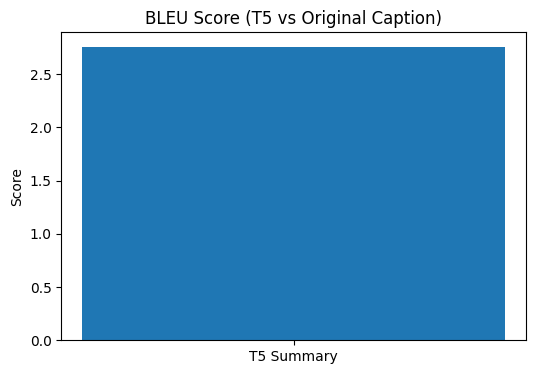

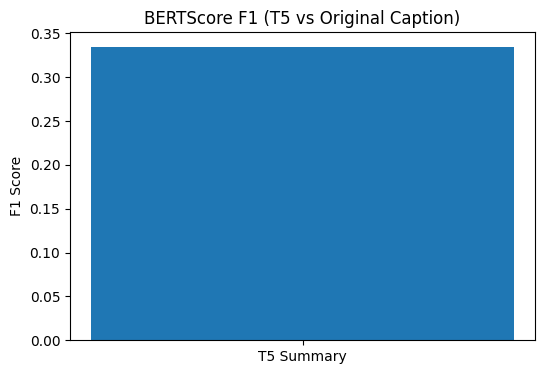

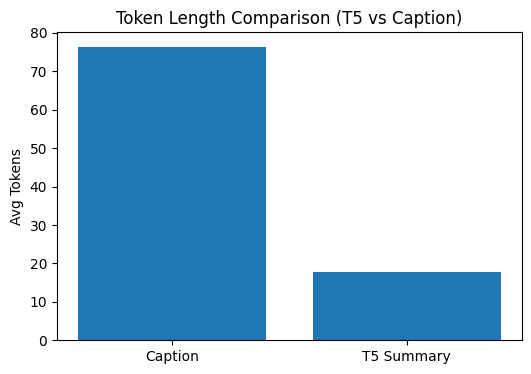

In [31]:
# ============================================
# 🔧 1) Install all dependencies
# ============================================
!pip install sacrebleu bert-score nltk transformers --quiet

import nltk
nltk.download('punkt')

# ============================================
# 🔧 2) Imports
# ============================================
import json, os
from transformers import pipeline
import torch
from tqdm import tqdm

import sacrebleu     # BLEU
import bert_score    # BERTScore
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# 🔧 3) Config
# ============================================
metadata_file = "/content/output/matched_pairs.json"
output_file = "/content/output/t5_summaries.json"

device = 0 if torch.cuda.is_available() else -1

# Use only T5
model_name = "google/flan-t5-base"   # ← Best choice

gen_kwargs = dict(
    max_length=64,
    min_length=20,
    num_beams=4,
    length_penalty=1.5,
    early_stopping=True,
    no_repeat_ngram_size=3,
)

# ============================================
# 🔧 4) Load dataset
# ============================================
with open(metadata_file, "r", encoding="utf-8") as f:
    dataset = json.load(f)

print(f"Loaded {len(dataset)} items")

# ============================================
# 🔧 5) Load summarizer (T5 only)
# ============================================
print("Loading FLAN-T5 model...")
summarizer = pipeline("summarization", model=model_name, device=device)

# ============================================
# 🔧 6) Summarization
# ============================================
results = []

for entry in tqdm(dataset, desc="Summarizing with T5"):
    vid = entry.get("id")
    caption = entry.get("caption", "").strip()

    if not caption:
        results.append({"id": vid, "caption": caption, "summary": ""})
        continue

    try:
        summary = summarizer(caption, **gen_kwargs)[0]["summary_text"]
    except Exception:
        summary = ""

    results.append({
        "id": vid,
        "caption": caption,
        "summary": summary
    })

# Save JSON
with open(output_file, "w", encoding="utf-8") as f:
    json.dump(results, f, indent=2, ensure_ascii=False)

print("Wrote:", output_file)

# ============================================
# 🔧 7) Evaluation vs ORIGINAL Captions
# ============================================
refs = [r["caption"] for r in results]
hyps = [r["summary"] for r in results]

pairs = [(r, h) for r, h in zip(refs, hyps) if r.strip() and h.strip()]
refs_f, hyps_f = zip(*pairs)

# BLEU
bleu_score = sacrebleu.corpus_bleu(hyps_f, [list(refs_f)]).score
print("BLEU Score:", bleu_score)

# BERTScore
P, R, F = bert_score.score(list(hyps_f), list(refs_f), lang="en", rescale_with_baseline=True)
bert_f1 = float(F.mean())
print("BERTScore F1:", bert_f1)

# Length Stats
len_caption = [len(c.split()) for c in refs_f]
len_summary = [len(s.split()) for s in hyps_f]

avg_cap = np.mean(len_caption)
avg_sum = np.mean(len_summary)

print("Avg Caption Tokens:", avg_cap)
print("Avg Summary Tokens:", avg_sum)

# ============================================
# 📊 8) Plots
# ============================================

# BLEU Plot
plt.figure(figsize=(6,4))
plt.bar(["T5 Summary"], [bleu_score])
plt.title("BLEU Score (T5 vs Original Caption)")
plt.ylabel("Score")
plt.show()

# BERTScore Plot
plt.figure(figsize=(6,4))
plt.bar(["T5 Summary"], [bert_f1])
plt.title("BERTScore F1 (T5 vs Original Caption)")
plt.ylabel("F1 Score")
plt.show()

# Length Compression Plot
plt.figure(figsize=(6,4))
plt.bar(["Caption", "T5 Summary"], [avg_cap, avg_sum])
plt.title("Token Length Comparison (T5 vs Caption)")
plt.ylabel("Avg Tokens")
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loaded: 33


Device set to use cuda:0
BART Summaries: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]


Saved: /content/output/bart_summaries.json
BART BLEU: 24.966567428823904


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BART BERTScore F1: 0.5810635089874268
Caption Tokens: 76.33333333333333
BART Summary Tokens: 33.57575757575758


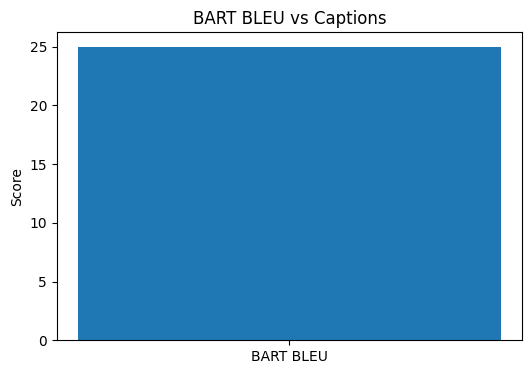

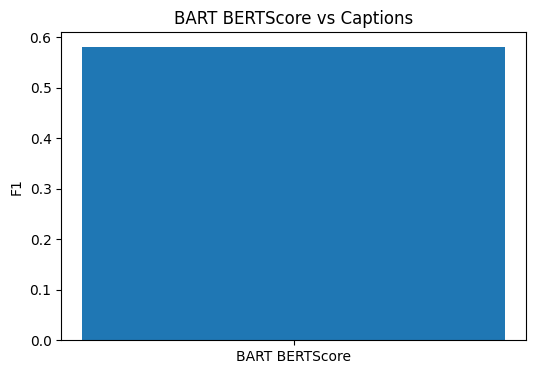

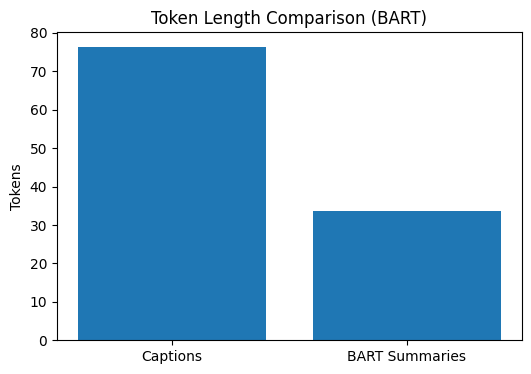

In [32]:
# ============================================
# 🔧 Install dependencies (if not already installed)
# ============================================
!pip install sacrebleu bert-score nltk transformers --quiet
import nltk
nltk.download('punkt')

# ============================================
# 🔧 Imports
# ============================================
import json, os
from transformers import pipeline
import torch
from tqdm import tqdm
import sacrebleu
import bert_score
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# 🔧 Config
# ============================================
metadata_file = "/content/output/matched_pairs.json"
output_file = "/content/output/bart_summaries.json"
device = 0 if torch.cuda.is_available() else -1

model_name = "facebook/bart-large-cnn"
gen_kwargs = dict(
    max_length=64,
    min_length=20,
    num_beams=4,
    length_penalty=1.5,
    early_stopping=True,
    no_repeat_ngram_size=3,
)

# ============================================
# 🔧 Load dataset
# ============================================
with open(metadata_file, "r") as f:
    dataset = json.load(f)
print("Loaded:", len(dataset))

# ============================================
# 🔧 Load BART
# ============================================
summarizer = pipeline("summarization", model=model_name, device=device)

# ============================================
# 🔧 Summarization
# ============================================
results = []
for entry in tqdm(dataset, desc="BART Summaries"):
    cap = entry["caption"].strip()
    if not cap:
        summary = ""
    else:
        summary = summarizer(cap, **gen_kwargs)[0]["summary_text"]

    results.append({
        "id": entry["id"],
        "caption": cap,
        "summary": summary
    })

# save
with open(output_file, "w") as f:
    json.dump(results, f, indent=2)
print("Saved:", output_file)

# ============================================
# 🔧 Evaluation
# ============================================
refs = [x["caption"] for x in results]
hyps = [x["summary"] for x in results]

pairs = [(r, h) for r, h in zip(refs, hyps) if r.strip() and h.strip()]
refs_f, hyps_f = zip(*pairs)

# BLEU
bleu = sacrebleu.corpus_bleu(hyps_f, [list(refs_f)]).score
print("BART BLEU:", bleu)

# BERTScore
P, R, F = bert_score.score(list(hyps_f), list(refs_f), lang="en", rescale_with_baseline=True)
bert_f1 = float(F.mean())
print("BART BERTScore F1:", bert_f1)

# Token length
len_cap = np.mean([len(r.split()) for r in refs_f])
len_sum = np.mean([len(s.split()) for s in hyps_f])
print("Caption Tokens:", len_cap)
print("BART Summary Tokens:", len_sum)

# ============================================
# 📊 Plots
# ============================================
plt.figure(figsize=(6,4))
plt.bar(["BART BLEU"], [bleu])
plt.ylabel("Score")
plt.title("BART BLEU vs Captions")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["BART BERTScore"], [bert_f1])
plt.ylabel("F1")
plt.title("BART BERTScore vs Captions")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(["Captions", "BART Summaries"], [len_cap, len_sum])
plt.ylabel("Tokens")
plt.title("Token Length Comparison (BART)")
plt.show()


In [40]:
# ============================================
# 🔊 Convert captions → Audio using gTTS
# ============================================

!pip install gtts --quiet
from gtts import gTTS
import json, os

metadata_file = "/content/output/bart_summaries.json"   # your caption file
audio_dir = "/content/caption_audio"
os.makedirs(audio_dir, exist_ok=True)

# Load dataset
with open(metadata_file, "r") as f:
    dataset = json.load(f)

print("Loaded:", len(dataset), "items")

# Convert to audio
for entry in dataset:
    vid = entry.get("id")
    caption = entry.get("summary", "").strip()

    if not caption:
        entry["audio_path"] = None
        continue

    audio_path = f"{audio_dir}/{vid}.mp3"

    try:
        tts = gTTS(caption, lang="en")
        tts.save(audio_path)
        entry["audio_path"] = audio_path
        print("Saved:", audio_path)
    except Exception as e:
        print("TTS failed:", vid, str(e))
        entry["audio_path"] = None

# Save updated JSON
with open(metadata_file, "w") as f:
    json.dump(dataset, f, indent=2)

print("🎉 All audio generated successfully!")


Loaded: 33 items
Saved: /content/caption_audio/3zC13ekq1Sk.mp3
Saved: /content/caption_audio/4L4DYEAfgFg.mp3
Saved: /content/caption_audio/3hVbyGblvMQ.mp3
Saved: /content/caption_audio/2pd5WNa0TFE.mp3
Saved: /content/caption_audio/1yMg9G9pyDU.mp3
Saved: /content/caption_audio/2tdS4N-8rV4.mp3
Saved: /content/caption_audio/3Gz8hP1QEO0.mp3
Saved: /content/caption_audio/3lGiYAr-Svs.mp3
Saved: /content/caption_audio/_9hzbuQ9PX0.mp3
Saved: /content/caption_audio/4pEOttwJvRg.mp3
Saved: /content/caption_audio/-3z0rt_HNl0.mp3
Saved: /content/caption_audio/2zxjNzuhaNM.mp3
Saved: /content/caption_audio/2fvP_SQM8NI.mp3
Saved: /content/caption_audio/3TBeIj4wbSE.mp3
Saved: /content/caption_audio/2VfC_NeTkHE.mp3
Saved: /content/caption_audio/1XeBotOFqHA.mp3
Saved: /content/caption_audio/3oUcGS3OIQQ.mp3
Saved: /content/caption_audio/0Rsc21xgwr8.mp3
Saved: /content/caption_audio/4YmCIp4qlGg.mp3
Saved: /content/caption_audio/_3kEH2ITVdI.mp3
Saved: /content/caption_audio/1tGxCUrr5XA.mp3
Saved: /content/c

In [20]:
!pip install gradio transformers gtts nltk --quiet
!pip install sacrebleu bert-score --quiet
import nltk
nltk.download('punkt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
import gradio as gr
import cv2, os, torch
import numpy as np
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer, pipeline
from gtts import gTTS
from PIL import Image
from pathlib import Path

# ---------------------------------------
# Load Models (Captioning + Summarization)
# ---------------------------------------

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image captioning model
cap_model_name = "nlpconnect/vit-gpt2-image-captioning"
cap_model = VisionEncoderDecoderModel.from_pretrained(cap_model_name).to(device)
cap_processor = ViTImageProcessor.from_pretrained(cap_model_name)
cap_tokenizer = AutoTokenizer.from_pretrained(cap_model_name)

# Summarizer (FLAN-T5)
sum_model_name = "google/flan-t5-base"
summarizer = pipeline("summarization", model=sum_model_name, device=0 if torch.cuda.is_available() else -1)


# ---------------------------------------
# Helper Functions
# ---------------------------------------

def extract_keyframes(video_path, n_frames=6):
    """Extract evenly spaced frames from a video."""
    save_dir = "frames_temp"
    os.makedirs(save_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total / fps

    timestamps = [i * duration / n_frames for i in range(n_frames)]
    frame_paths = []

    for idx, t in enumerate(timestamps):
        cap.set(cv2.CAP_PROP_POS_MSEC, t * 1000)
        success, frame = cap.read()
        if success:
            path = f"{save_dir}/frame_{idx}.jpg"
            cv2.imwrite(path, frame)
            frame_paths.append(path)

    cap.release()
    return frame_paths


def generate_caption(image_path):
    """Generate caption for a single image."""
    image = Image.open(image_path).convert("RGB")
    pixel_values = cap_processor(images=image, return_tensors="pt").pixel_values.to(device)

    with torch.no_grad():
        output_ids = cap_model.generate(pixel_values, max_length=20, num_beams=4)
    caption = cap_tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return caption


def summarize_text(text):
    """Summarize using FLAN-T5."""
    summary = summarizer(
        text,
        max_length=60,
        min_length=15,
        num_beams=4,
        no_repeat_ngram_size=3
    )[0]['summary_text']
    return summary


def text_to_audio(text):
    """Convert summary to audio."""
    audio_path = "summary_audio.mp3"
    tts = gTTS(text)
    tts.save(audio_path)
    return audio_path


# ---------------------------------------
# Main Gradio Processing Function
# ---------------------------------------

def process_video(video):
    # video is already a file path
    temp_video_path = video


    # 1. Extract frames
    frames = extract_keyframes(temp_video_path)

    # 2. Generate captions per frame
    frame_captions = [generate_caption(fp) for fp in frames]

    # 3. Combine caption
    combined_caption = " ".join(frame_captions)

    # 4. Summarize
    summary = summarize_text(combined_caption)

    # 5. Convert to audio
    audio_file = text_to_audio(summary)

    # 6. Return all outputs
    return (
        frames,
        "\n".join(frame_captions),
        combined_caption,
        summary,
        audio_file
    )


# ---------------------------------------
# Gradio UI
# ---------------------------------------

app = gr.Interface(
    fn=process_video,
    inputs=gr.Video(label="Upload Video"),
    outputs=[
        gr.Gallery(label="Extracted Frames"),
        gr.Textbox(label="Frame Captions"),
        gr.Textbox(label="Combined Caption"),
        gr.Textbox(label="Summary (T5)"),
        gr.Audio(label="Summary Audio (gTTS)")
    ],
    title="🎬 Video → Caption → Summary → Audio Generator",
    description="Upload a video. The system extracts keyframes, generates captions, summarizes them, and converts the summary to speech."
)

app.launch(debug=True)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://6e966f8da17d076662.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
Both `max_new_tokens` (=256) and `max_length`(=60) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://6e966f8da17d076662.gradio.live


In [ ]:
import os
import json
from pathlib import Path
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import librosa
import soundfile as sf
from transformers import CLIPProcessor, CLIPModel

# -------------------------
# Config / Paths / Device
# -------------------------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

METADATA_FILE = "/content/output/matched_pairs.json"  # your JSON with "caption" and optionally "audio_path"
CHECKPOINT_DIR = "/content/checkpoints"
os.makedirs(CHECKPOINT_DIR, exist_ok=True)

# Hyperparameters
BATCH_SIZE = 4
AUDIO_SR = 16000
AUDIO_DURATION = 5.0
AUDIO_LEN = int(AUDIO_SR * AUDIO_DURATION)
LR = 1e-4
EPOCHS = 15
NUM_TIMESTEPS = 1000
DIFFUSION_STEPS_INFER = 200
LATENT_DIM = 512

In [ ]:
class CaptionAudioDataset(Dataset):
    def __init__(self, metadata_path, audio_sr=AUDIO_SR, audio_duration=AUDIO_DURATION):
        with open(metadata_path, "r") as f:
            self.data = json.load(f)
        self.audio_sr = audio_sr
        self.audio_len = int(audio_sr * audio_duration)

    def load_audio(self, path):
        y, sr = librosa.load(path, sr=self.audio_sr, mono=True)
        if len(y) > self.audio_len:
            y = y[:self.audio_len]
        elif len(y) < self.audio_len:
            y = np.pad(y, (0, self.audio_len - len(y)))
        return torch.from_numpy(y).float()

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        entry = self.data[idx]
        caption = entry.get("caption", "")
        item = {"caption": caption, "id": entry.get("id", "")}
        if "audio_path" in entry:
            item["audio"] = self.load_audio(entry["audio_path"])
        return item

from torch.utils.data import random_split

# Load full dataset
full_dataset = CaptionAudioDataset(METADATA_FILE)

# Split: 80% train, 10% val, 10% test
total_len = len(full_dataset)
train_len = int(0.8 * total_len)
val_len = int(0.1 * total_len)
test_len = total_len - train_len - val_len

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_len, val_len, test_len])

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2, pin_memory=True)



In [ ]:
# -------------------------
# 2) Models
# -------------------------
# 2.1 Text encoder (CLIP text)
from transformers import CLIPModel, CLIPTokenizerFast

class TextEncoderWrapper(nn.Module):
    def __init__(self, model_name="openai/clip-vit-base-patch32", freeze=True, device=DEVICE):
        super().__init__()
        # Use CLIPModel and CLIPTokenizerFast for text encoding
        self.clip = CLIPModel.from_pretrained(model_name)
        self.tokenizer = CLIPTokenizerFast.from_pretrained(model_name)
        if freeze:
            for p in self.clip.parameters():
                p.requires_grad = False
        self.out_dim = self.clip.text_model.config.hidden_size

        # ensure clip model is on device
        self.clip.to(device)

    def forward(self, texts: list):
        # Tokenize then move tensors to device explicitly
        inputs = self.tokenizer(text=texts, return_tensors="pt", padding=True, truncation=True)
        for k, v in inputs.items():
            inputs[k] = v.to(next(self.clip.parameters()).device)
        # get_text_features will run on the model's device
        out = self.clip.get_text_features(**inputs)   # [B, out_dim]
        return out


# 2.2 Projection MLP
class ProjectionMLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, in_dim),
            nn.GELU(),
            nn.Linear(in_dim, out_dim)
        )
    def forward(self, x):
        return self.net(x)

class AudioAutoencoder(nn.Module):
    def __init__(self, audio_len, latent_dim=LATENT_DIM):
        super().__init__()
        self.audio_len = audio_len
        self.latent_dim = latent_dim

        # Calculate intermediate sequence length after convolutions
        # audio_len -> /2 -> /2 -> /2 = audio_len / 8
        self.encoded_seq_len = audio_len // 8

        # Encoder: Progressively compress audio
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=4, stride=2, padding=1),  # audio_len / 2
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=4, stride=2, padding=1),  # audio_len / 4
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=4, stride=2, padding=1),  # audio_len / 8
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)  # [B, 64, 1]
        )
        self.fc_encode = nn.Linear(64, latent_dim)

        # Decoder: Expand latent back to audio
        self.hidden_channels = 64
        self.decoder_start_len = max(audio_len // 64, 4)  # Start from small sequence
        self.fc_decode = nn.Linear(latent_dim, self.hidden_channels * self.decoder_start_len)

        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(self.hidden_channels, 64, kernel_size=4, stride=2, padding=1),  # x2
            nn.ReLU(),
            nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1),  # x2
            nn.ReLU(),
            nn.ConvTranspose1d(32, 16, kernel_size=4, stride=2, padding=1),  # x2
            nn.ReLU(),
            nn.ConvTranspose1d(16, 8, kernel_size=4, stride=2, padding=1),  # x2
            nn.ReLU(),
            nn.Conv1d(8, 1, kernel_size=3, padding=1)  # project to audio
        )

    def encode(self, audio):
        """Encode audio [B, audio_len] -> [B, latent_dim]"""
        x = audio.unsqueeze(1)  # [B, 1, audio_len]
        x = self.encoder(x).squeeze(-1)  # [B, 64]
        z = self.fc_encode(x)  # [B, latent_dim]
        return z

    def decode(self, z):
        """Decode latent [B, latent_dim] -> [B, audio_len]"""
        B = z.shape[0]

        # Project and reshape
        x = self.fc_decode(z)  # [B, hidden_channels * decoder_start_len]
        x = x.view(B, self.hidden_channels, self.decoder_start_len)  # [B, 64, start_len]

        # Decode through transposed convolutions
        x = self.decoder(x)  # [B, 1, upsampled_len]
        x = x.squeeze(1)  # [B, upsampled_len]

        # Ensure exact length match
        if x.shape[1] > self.audio_len:
            x = x[:, :self.audio_len]
        elif x.shape[1] < self.audio_len:
            pad_size = self.audio_len - x.shape[1]
            x = F.pad(x, (0, pad_size))

        return x

    def forward(self, audio):
        """Full autoencoder pass"""
        z = self.encode(audio)
        reconstructed = self.decode(z)
        return reconstructed, z


# 2.4 Diffusion Transformer denoiser
class DiffusionTransformer(nn.Module):
    def __init__(self, latent_dim=LATENT_DIM, ctx_dim=512, n_layers=6, n_heads=8, ff_mult=4):
        super().__init__()
        d_model = latent_dim
        self.latent_dim = latent_dim
        self.time_embed = nn.Sequential(nn.Linear(1, d_model), nn.GELU(), nn.Linear(d_model, d_model))
        self.n_layers = n_layers

        # Fixed projection from context dim -> model dim (avoid creating inside forward)
        if ctx_dim != d_model:
            self.ctx_proj_internal = nn.Linear(ctx_dim, d_model)
        else:
            self.ctx_proj_internal = None

        self.blocks = nn.ModuleList([
            nn.ModuleDict({
                'self_attn': nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads, batch_first=True),
                'cross_attn': nn.MultiheadAttention(embed_dim=d_model, num_heads=n_heads, batch_first=True),
                'ln1': nn.LayerNorm(d_model),
                'ln2': nn.LayerNorm(d_model),
                'ff': nn.Sequential(nn.Linear(d_model, ff_mult*d_model), nn.GELU(), nn.Linear(ff_mult*d_model, d_model)),
                'ln3': nn.LayerNorm(d_model)
            }) for _ in range(n_layers)
        ])
        self.final_ln = nn.LayerNorm(d_model)
        self.out_proj = nn.Linear(d_model, latent_dim)

    def forward(self, z_t, t, context):
        B = z_t.shape[0]
        # t -> normalized float embedding
        t = t.float().unsqueeze(-1) / float(NUM_TIMESTEPS)
        x = z_t + self.time_embed(t.to(z_t.device))
        x = x.unsqueeze(1)  # [B, 1, latent_dim]

        # context: [B, ctx_dim] -> [B, 1, d_model]
        ctx = context.unsqueeze(1)
        if self.ctx_proj_internal is not None:
            ctx = self.ctx_proj_internal(ctx)

        for block in self.blocks:
            x_ = block['ln1'](x)
            sa, _ = block['self_attn'](x_, x_, x_)
            x = x + sa
            x_ = block['ln2'](x)
            ca, _ = block['cross_attn'](x_, ctx, ctx)
            x = x + ca
            x_ = block['ln3'](x)
            x = x + block['ff'](x_)
        x = self.final_ln(x).squeeze(1)
        return self.out_proj(x)  # [B, latent_dim]


In [ ]:
# -------------------------
# 3) Diffusion helpers
# -------------------------
def linear_beta_schedule(timesteps, beta_start=1e-4, beta_end=0.02):
    return torch.linspace(beta_start, beta_end, timesteps)
betas = linear_beta_schedule(NUM_TIMESTEPS).to(DEVICE)
alphas = 1 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1 - alphas_cumprod)

def q_sample(x_start, t, noise=None):
    if noise is None:
        noise = torch.randn_like(x_start)
    sqrt_acp = sqrt_alphas_cumprod[t].unsqueeze(-1)
    sqrt_om_acp = sqrt_one_minus_alphas_cumprod[t].unsqueeze(-1)
    return sqrt_acp * x_start + sqrt_om_acp * noise


In [ ]:
print("Initializing models...")
text_encoder = TextEncoderWrapper().to(DEVICE)
ctx_proj = ProjectionMLP(text_encoder.out_dim, 512).to(DEVICE)
audio_ae = AudioAutoencoder(AUDIO_LEN).to(DEVICE)
denoiser = DiffusionTransformer().to(DEVICE)

optim = torch.optim.AdamW(
    list(ctx_proj.parameters()) + list(audio_ae.parameters()) + list(denoiser.parameters()), lr=LR
)

Initializing models...


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [ ]:
# -------------------------
# 5) Training loop
# -------------------------
def train_one_epoch(dataloader, epoch):
    denoiser.train(); audio_ae.train(); ctx_proj.train()
    running_loss = 0.0
    pbar = tqdm(enumerate(dataloader), total=len(dataloader))
    for i, batch in pbar:
        audios = batch['audio'].to(DEVICE)
        captions = batch['caption']
        B = audios.shape[0]

        with torch.no_grad():
            text_feats = text_encoder(captions)
        context = ctx_proj(text_feats)

        z0 = audio_ae.encode(audios)
        t = torch.randint(0, NUM_TIMESTEPS, (B,), device=DEVICE).long()
        noise = torch.randn_like(z0)
        zt = q_sample(z0, t, noise=noise)

        pred_noise = denoiser(zt, t, context)
        loss = F.mse_loss(pred_noise, noise)

        optim.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(list(denoiser.parameters()) + list(audio_ae.parameters()) + list(ctx_proj.parameters()), 1.0)
        optim.step()

        running_loss += loss.item()
        pbar.set_description(f"Epoch {epoch+1} loss={loss.item():.4f}")
    return running_loss / len(dataloader)

def train_epochs(train_loader, val_loader=None, epochs=EPOCHS):
    for ep in range(epochs):
        avg_loss = train_one_epoch(train_loader, ep)
        print(f"Epoch {ep+1} finished. Avg loss: {avg_loss:.4f}")

        # Optional: validation
        if val_loader:
            val_loss = 0.0
            denoiser.eval(); audio_ae.eval(); ctx_proj.eval()
            with torch.no_grad():
                for batch in val_loader:
                    audios = batch['audio'].to(DEVICE)
                    captions = batch['caption']
                    B = audios.shape[0]
                    text_feats = text_encoder(captions)
                    context = ctx_proj(text_feats)
                    z0 = audio_ae.encode(audios)
                    t = torch.randint(0, NUM_TIMESTEPS, (B,), device=DEVICE).long()
                    noise = torch.randn_like(z0)
                    zt = q_sample(z0, t, noise=noise)
                    pred_noise = denoiser(zt, t, context)
                    val_loss += F.mse_loss(pred_noise, noise).item()
            val_loss /= len(val_loader)
            print(f"Validation loss: {val_loss:.4f}")

        ckpt = {'denoiser': denoiser.state_dict(), 'audio_ae': audio_ae.state_dict(),
                'ctx_proj': ctx_proj.state_dict(), 'optim': optim.state_dict(), 'epoch': ep}
        ckpt_path = os.path.join(CHECKPOINT_DIR, f"checkpoint_ep{ep+1}.pt")
        torch.save(ckpt, ckpt_path)
        print(f"Saved checkpoint: {ckpt_path}")



In [ ]:
# -------------------------
# 6) Sampling / Inference
# -------------------------
@torch.no_grad()
def p_sample_loop(shape, context, denoiser, steps=DIFFUSION_STEPS_INFER):
    device = next(denoiser.parameters()).device
    B = shape[0]
    z = torch.randn(shape, device=device)

    for i in tqdm(reversed(range(steps)), desc="Sampling"):
       # compute integer timestep mapped from sampling step (safer mapping)
        t_step = int(round(i * (NUM_TIMESTEPS - 1) / float(max(1, steps - 1))))
        t = torch.full((B,), t_step, device=device, dtype=torch.long)

        pred_noise = denoiser(z, t, context)

        beta_t = betas[t].unsqueeze(-1)
        alpha_t = alphas[t].unsqueeze(-1)
        alpha_cum_t = alphas_cumprod[t].unsqueeze(-1)

        z = (1/torch.sqrt(alpha_t))*(z - (beta_t/torch.sqrt(1-alpha_cum_t))*pred_noise)

        if i > 0:
            z = z + torch.sqrt(beta_t)*torch.randn_like(z)

    return z

@torch.no_grad()
def generate_audio_from_caption(caption, save_path=None):
    # Encode text to context
    text_feats = text_encoder([caption])  # [1, text_dim]
    context = ctx_proj(text_feats)         # [1, latent_dim]

    # Generate latent via diffusion - keep batch dimension
    z_gen = p_sample_loop((1, audio_ae.latent_dim), context, denoiser)  # [1, latent_dim]

    # Decode latent to audio - NO SQUEEZE, keep batch dimension
    audio = audio_ae.decode(z_gen)  # [1, audio_len]

    # Now squeeze and convert to numpy
    audio = audio.squeeze(0).cpu().numpy()  # [audio_len]

    # Normalize
    audio = audio / (np.abs(audio).max() + 1e-8)

    # Save
    if save_path:
        sf.write(save_path, audio, AUDIO_SR)

    return audio



In [ ]:
# -------------------------
# 7) Evaluation
# -------------------------
@torch.no_grad()
def evaluate(dataset):
    """Evaluate the model on a dataset and print metrics."""
    denoiser.eval(); audio_ae.eval(); ctx_proj.eval()
    total_loss = 0.0
    total_mse_audio = 0.0
    total_mae_audio = 0.0
    num_samples = 0

    dataloader = DataLoader(dataset, batch_size=1, shuffle=False, num_workers=2, pin_memory=True)

    print("\n📊 Evaluating model...")
    for batch in tqdm(dataloader, desc="Evaluating"):
        audios = batch['audio'].to(DEVICE)
        captions = batch['caption']
        B = audios.shape[0]

        # Generate audio from caption
        text_feats = text_encoder(captions)
        context = ctx_proj(text_feats)
        z_gen = p_sample_loop((B, audio_ae.latent_dim), context, denoiser)
        generated_audio = audio_ae.decode(z_gen)

        # Calculate loss (optional, as we don't train here)
        # For evaluation, we can compare generated audio to ground truth if available
        if 'audio' in batch:
            # Calculate MSE and MAE on the audio waveform
            total_mse_audio += F.mse_loss(generated_audio, audios).item() * B
            total_mae_audio += torch.mean(torch.abs(generated_audio - audios)).item() * B
            num_samples += B

    print("\n--- Evaluation Metrics ---")
    if num_samples > 0:
        print(f"Average Audio MSE: {total_mse_audio / num_samples:.6f}")
        print(f"Average Audio MAE: {total_mae_audio / num_samples:.6f}")
    else:
        print("No audio data available in the dataset for evaluation.")
    print("------------------------")

In [ ]:
if __name__ == "__main__":
    # Train with train/val split
    train_epochs(train_loader, val_loader, epochs=EPOCHS)

    # Generate example
    sample_caption = "a blurry photo of a street scene a man wearing a suit and tie a young boy is holding a wii remote a man and a woman standing next to each other in a kitchen a woman in a red dress standing in front of a door a woman in a white dress is looking at her cell phone a woman holding a baseball bat over her head a young man is looking at his cell phone"
    out_wav = "/content/generated_from_caption.wav"
    audio = generate_audio_from_caption(sample_caption, save_path=out_wav)
    print("Saved generated audio to:", out_wav)

    # Evaluate on test set
    test_dataset_obj = test_loader.dataset
    evaluate(test_dataset_obj)

Epoch 1 loss=0.9779: 100%|██████████| 6/6 [00:07<00:00,  1.18s/it]

Epoch 1 finished. Avg loss: 1.0061


Validation loss: 0.9980
Saved checkpoint: /content/checkpoints/checkpoint_ep1.pt


Epoch 2 loss=1.0035: 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

Epoch 2 finished. Avg loss: 0.9840


Validation loss: 0.9827
Saved checkpoint: /content/checkpoints/checkpoint_ep2.pt


Epoch 3 loss=0.9756: 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]

Epoch 3 finished. Avg loss: 1.0208


Validation loss: 1.0050
Saved checkpoint: /content/checkpoints/checkpoint_ep3.pt


Epoch 4 loss=1.0673: 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

Epoch 4 finished. Avg loss: 1.0213


Validation loss: 0.9877
Saved checkpoint: /content/checkpoints/checkpoint_ep4.pt


Epoch 5 loss=1.0346: 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

Epoch 5 finished. Avg loss: 1.0133


Validation loss: 1.0346
Saved checkpoint: /content/checkpoints/checkpoint_ep5.pt


Epoch 6 loss=1.0135: 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

Epoch 6 finished. Avg loss: 1.0510


Validation loss: 0.9654
Saved checkpoint: /content/checkpoints/checkpoint_ep6.pt


Epoch 7 loss=0.9925: 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

Epoch 7 finished. Avg loss: 0.9923


Validation loss: 0.9993
Saved checkpoint: /content/checkpoints/checkpoint_ep7.pt


Epoch 8 loss=1.0344: 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]

Epoch 8 finished. Avg loss: 1.0318


Validation loss: 1.0347
Saved checkpoint: /content/checkpoints/checkpoint_ep8.pt


Epoch 9 loss=0.9678: 100%|██████████| 6/6 [00:06<00:00,  1.09s/it]

Epoch 9 finished. Avg loss: 1.0039


Validation loss: 1.0095
Saved checkpoint: /content/checkpoints/checkpoint_ep9.pt


Epoch 10 loss=1.0011: 100%|██████████| 6/6 [00:06<00:00,  1.03s/it]

Epoch 10 finished. Avg loss: 1.0130


Validation loss: 1.0186
Saved checkpoint: /content/checkpoints/checkpoint_ep10.pt


Epoch 11 loss=1.0989: 100%|██████████| 6/6 [00:06<00:00,  1.11s/it]

Epoch 11 finished. Avg loss: 1.0207


Validation loss: 0.9903
Saved checkpoint: /content/checkpoints/checkpoint_ep11.pt


Epoch 12 loss=0.9869: 100%|██████████| 6/6 [00:07<00:00,  1.22s/it]

Epoch 12 finished. Avg loss: 1.0029


Validation loss: 0.9414
Saved checkpoint: /content/checkpoints/checkpoint_ep12.pt


Epoch 13 loss=0.9732: 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

Epoch 13 finished. Avg loss: 1.0033


Validation loss: 1.0041
Saved checkpoint: /content/checkpoints/checkpoint_ep13.pt


Epoch 14 loss=1.0081: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Epoch 14 finished. Avg loss: 1.0032


Validation loss: 1.0408
Saved checkpoint: /content/checkpoints/checkpoint_ep14.pt


Epoch 15 loss=1.0426: 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]

Epoch 15 finished. Avg loss: 1.0131


Validation loss: 0.9840
Saved checkpoint: /content/checkpoints/checkpoint_ep15.pt


Sampling: 200it [00:01, 161.64it/s]


Saved generated audio to: /content/generated_from_caption.wav

📊 Evaluating model...


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]
Sampling: 0it [00:00, ?it/s]
Sampling: 10it [00:00, 94.33it/s]
Sampling: 21it [00:00, 99.29it/s]
Sampling: 31it [00:00, 90.27it/s]
Sampling: 41it [00:00, 77.80it/s]
Sampling: 50it [00:00, 80.97it/s]
Sampling: 66it [00:00, 104.53it/s]
Sampling: 84it [00:00, 125.34it/s]
Sampling: 102it [00:00, 139.71it/s]
Sampling: 119it [00:01, 147.49it/s]
Sampling: 137it [00:01, 155.81it/s]
Sampling: 155it [00:01, 161.12it/s]
Sampling: 172it [00:01, 161.83it/s]
Sampling: 200it [00:01, 134.35it/s]
Evaluating:  25%|██▌       | 1/4 [00:03<00:11,  3.87s/it]
Sampling: 0it [00:00, ?it/s]
Sampling: 18it [00:00, 168.91it/s]
Sampling: 35it [00:00, 159.12it/s]
Sampling: 52it [00:00, 161.43it/s]
Sampling: 69it [00:00, 161.73it/s]
Sampling: 86it [00:00, 164.29it/s]
Sampling: 103it [00:00, 163.70it/s]
Sampling: 120it [00:00, 164.61it/s]
Sampling: 137it [00:00, 165.74it/s]
Sampling: 154it [00:00, 166.64it/s]
Sampling: 171it [00:01, 167.41it/s]
Sampling: 200it [00:01,


--- Evaluation Metrics ---
Average Audio MSE: 0.004472
Average Audio MAE: 0.034655
------------------------
